In [16]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [17]:
# Path to your dataset
data_dir = '/content/drive/MyDrive/Neural Network /week-4/week-4 assignment /datasets CNN week-4'

In [18]:
# Preprocess the dataset
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2  # 20% of data for validation
)


In [19]:
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 453 images belonging to 23 classes.
Found 94 images belonging to 23 classes.


In [20]:
# Get number of classes
num_classes = len(train_generator.class_indices)

In [21]:
# Experiment configurations
configurations = [
    {
        "filters": [32, 64, 128],
        "activation": "relu",
        "pooling": "max",  # Options: "max" or "average"
        "dropout": 0.5,
        "batch_size": 32,
        "learning_rate": 0.001,
        "epochs": 10
    },
    {
        "filters": [32, 64, 128],
        "activation": "swish",
        "pooling": "average",
        "dropout": 0.3,
        "batch_size": 16,
        "learning_rate": 0.0001,
        "epochs": 20
    },
    {
        "filters": [64, 128, 256],
        "activation": "tanh",
        "pooling": "max",
        "dropout": 0.4,
        "batch_size": 64,
        "learning_rate": 0.001,
        "epochs": 15
    }
]

In [22]:
# Helper function to build a model based on configuration
def build_model(filters, activation, pooling, dropout):
    model = Sequential()
    for i, filter_size in enumerate(filters):
        if i == 0:
            # Input layer
            model.add(Conv2D(filter_size, kernel_size=(3, 3), activation=activation, input_shape=(128, 128, 3)))
        else:
            model.add(Conv2D(filter_size, kernel_size=(3, 3), activation=activation))
        if pooling == "max":
            model.add(MaxPooling2D(pool_size=(2, 2)))
        elif pooling == "average":
            model.add(AveragePooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation=activation))
    model.add(Dropout(dropout))
    model.add(Dense(num_classes, activation='softmax'))
    return model

In [23]:
# Run experiments
for i, config in enumerate(configurations):
    print(f"Running Experiment {i + 1}...")
    model = build_model(
        filters=config["filters"],
        activation=config["activation"],
        pooling=config["pooling"],
        dropout=config["dropout"]
    )
    # Compile the model
    model.compile(
        optimizer=Adam(learning_rate=config["learning_rate"]),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

Running Experiment 1...
Running Experiment 2...
Running Experiment 3...


In [24]:
    # Model summary
    print(model.summary())

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 126, 126, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 63, 63, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 61, 61, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 23)                  │           5,911 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,222,039 (50.44 MB)

 Trainable params: 13,222,039 (50.44 MB)

 Non-trainable params: 0 (0.00 B)

None


In [25]:
    # Train the model
    history = model.fit(
        train_generator,
        validation_data=val_generator,
        epochs=config["epochs"],
        batch_size=config["batch_size"]
    )

Epoch 1/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 57s 4s/step - accuracy: 0.0711 - loss: 4.5723 - val_accuracy: 0.0638 - val_loss: 3.3789
Epoch 2/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.0643 - loss: 3.8408 - val_accuracy: 0.0851 - val_loss: 3.1371
Epoch 3/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.0902 - loss: 3.5048 - val_accuracy: 0.0851 - val_loss: 3.0620
Epoch 4/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 0.0615 - loss: 3.5777 - val_accuracy: 0.0745 - val_loss: 3.2208
Epoch 5/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - accuracy: 0.0731 - loss: 3.7592 - val_accuracy: 0.1170 - val_loss: 3.1303
Epoch 6/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.0710 - loss: 3.7024 - val_accuracy: 0.0957 - val_loss: 2.9786
Epoch 7/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 84s 4s/step - accuracy: 0.0884 - loss: 3.5579 - val_accuracy: 0.0638 - val_loss: 3.0596
Epoch 8/15
15/15 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.0894 - loss: 3.4792 - val_accuracy: 0.1170 - val_loss:

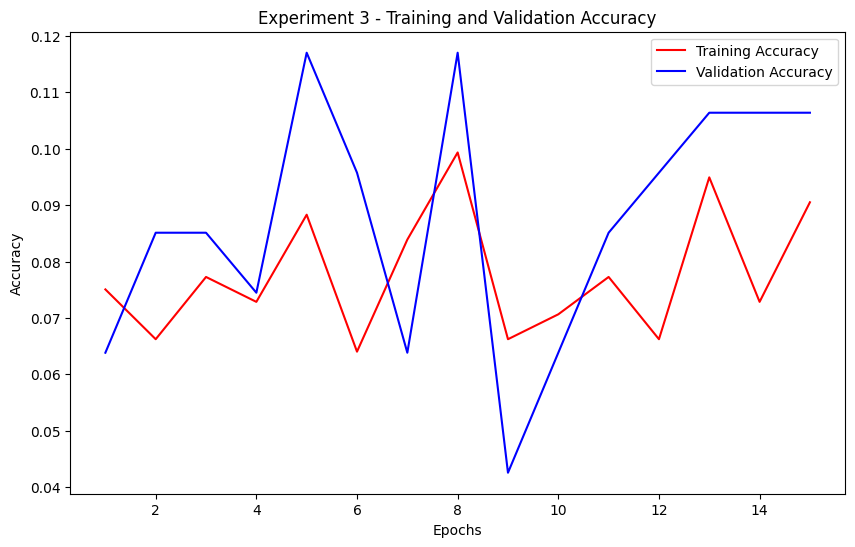

In [26]:
   # Plot training and validation accuracy
   acc = history.history['accuracy']
   val_acc = history.history['val_accuracy']
   loss = history.history['loss']
   val_loss = history.history['val_loss']

   epochs = range(1, len(acc) + 1)
   plt.figure(figsize=(10, 6))
   plt.plot(epochs, acc, 'r', label='Training Accuracy')
   plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
   plt.title(f"Experiment {i + 1} - Training and Validation Accuracy")
   plt.xlabel('Epochs')
   plt.ylabel('Accuracy')
   plt.legend()
   plt.show()